#  US Gap Analysis Project - WV Breeding Bird Atlas Data Comparison 
Nathan Tarr and Jessie Jordan

## Summary of cover type associations in West Virginia
We investigated the agreement between WV Breeding Bird Atlas (2011-2015) and USGS Gap Analysis Project data on 

In [7]:
import pandas as pd
import repo_functions as fun
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 400)
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 15)

# Load land cover crosswalk - slow loading for some reason
cross = pd.read_csv(fun.dataDir + "LandCover/land_cover_crosswalk.csv", header=0, dtype={'GAP_code': str}) 

In [41]:
# Perform crosswalk of detections from WV -> USGAP
master, GAP_linked, unmatched, gap_types, wv_types = fun.cross_to_GAP(species, cross)


System associations in the GAP model
                                                                     GAP_name
GAP_code                                                                     
1201                                                    Developed, Open Space
1201                                                    Developed, Open Space
1202                                                 Developed, Low-intensity
1202                                                 Developed, Low-intensity
4104                  Northeastern Interior Dry Oak Forest-Hardwood Modifier*
4104                  Northeastern Interior Dry Oak Forest-Hardwood Modifier*
4106                    Northeastern Interior Dry Oak Forest - Mixed Modifier
4109                      Southern and Central Appalachian Oak Forest - Xeric
4119                            Southern Appalachian Northern Hardwood Forest
4119                            Southern Appalachian Northern Hardwood Forest
4119                      

In [42]:
# Show validated associations ------------------------------------------------
print("Validated associations")
df_valid = master[master['evaluation'] == 'valid']
print(df_valid[['GAP_code', 'GAP_name', 'detections']])

Validated associations
   GAP_code                                       GAP_name  detections
14     4119  Southern Appalachian Northern Hardwood Forest         3.0
17     4202                 Southern Piedmont Mesic Forest        21.0
30     4538  Southern Appalachian Low Mountain Pine Forest         3.0
38     8504                                 Ruderal forest       111.0


In [43]:
# Show supported additions ---------------------------------------------------
print("New GAP ecological system associations that are supported by WVBBA:")
df_add = master[master['evaluation'] == 'add_association']
print(df_add[['GAP_code', 'GAP_name', 'detections']])

New GAP ecological system associations that are supported by WVBBA:
   GAP_code                                     GAP_name  detections
0         0                                          NaN        13.0
6      1402                          Cultivated Cropland         3.0
7      1403                                  Pasture/Hay        13.0
9      3105                 Undifferentiated Barren Land        22.0
27     4335  Central Appalachian Pine-Oak Rocky Woodland         4.0


#### Aggregate "unmatched" across all species and present a figure or table.

In [44]:
# Show invalid WV codes entered ----------------------------------------------
print("Invalid habitat codes entered by WVBBA observers:")
print(unmatched)

Invalid habitat codes entered by WVBBA observers:
{'16d': 6.0, '17': 38.0, '18d': 2.0, '1la': 1.0, '39': 1.0, '3a': 10.0}


#### Make a version of the result below that aggregates across species (i.e., average # records used for validations).

                      detections
Unusable                   776.0
Supported validation       138.0
Supported addition          55.0
Total detections           969.0


Text(0, 0.5, '')

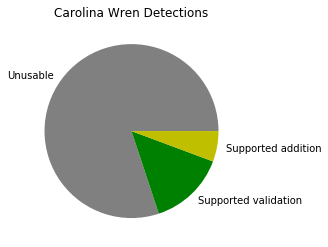

In [45]:
# Report and plot results for usable detections ------------------------------
usable_df = pd.DataFrame(index=["Unusable", "Supported validation",
                                "Supported addition", "Total detections"], 
                         columns=["detections"])
usable_df.loc['Supported validation', 'detections'] = int(df_valid[['detections']].sum())
usable_df.loc['Supported addition', 'detections'] = int(df_add[['detections']].sum())
usable_df.loc['Total detections', 'detections'] = wv_types['detections'].sum()
usable_df.loc['Unusable', 'detections'] = int(wv_types['detections'].sum() - 
                                           df_valid[['detections']].sum() - 
                                           df_add[['detections']].sum())
usable_df = usable_df.fillna(0)
print(usable_df)
plt1 = usable_df.drop(['Total detections']).plot(y='detections', kind='pie',
                                                 legend=False, 
                                                 title = species + " Detections",
                                                 colors=['gray', 'g', 'y'])
plt1.set_ylabel("")

#### Make a version of the result below that aggregates across species (i.e., average # of cover associations that were validated).

             GAP_types
Unvalidated         25
Validated            4
Additions            5


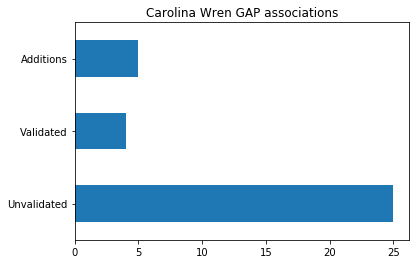

In [46]:
# Report and plot results for proportion of GAP systems validated ------------------------------
eval_df = pd.DataFrame(index=["Unvalidated", "Validated", "Additions"], columns=["GAP_types"])
eval_df.loc['Unvalidated', "GAP_types"] = len(gap_types) - len(df_valid)
eval_df.loc['Validated', "GAP_types"] = len(df_valid)
eval_df.loc['Additions', "GAP_types"] = len(df_add)
eval_df = eval_df.fillna(0)
print(eval_df)
plt2 = eval_df.plot(y='GAP_types', kind='barh', legend=False, title = species + " GAP associations")

#### List GAP_types with number of species for which types was validated, addition was supported, or unvalidated.